In [2]:
import json
import pprint
import csv
import numpy as np
import unicodedata


In [3]:
################################################################################
# filter useful info from review.json to output/reviews.csv
################################################################################
columns = ['Id', 'UserId', 'Stars', 'Date', 'BusinessId'] #create required columns 
question_dataframe_file = open('./output/reviews.csv', 'wb')
writer = csv.writer(question_dataframe_file, delimiter=',')
writer.writerow(columns)
c = 0
with open('./yelp_dataset/yelp_academic_dataset_review.json') as data_file:
    for line in data_file:
        c+=1
        review = json.loads(line)
        writer.writerow([review['review_id'], review['user_id'], review['stars'], review['date'], review['business_id'] ] )
        if c%100000==0:
            print c
print c


100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2225213


In [4]:
########################################
# flatten dict keys in business.csv
########################################
c = 0
cols = []
with open('./yelp_dataset/yelp_academic_dataset_business.json') as data_file:
    for line in data_file:           
        c+=1
        review = json.loads(line)
        #print review
        for catg in review:
            if type(review[catg]) is dict:
                for item in review[catg]:
                    if type(review[catg][item]) is dict:
                        for nesteditem in review[catg][item]:
                            toappend = catg+":"+item+":"+nesteditem
                            if toappend not in cols:
                                cols.append(toappend)
                                #print toappend
                    else:
                        toappend = catg+":"+item
                        if toappend not in cols:
                            cols.append(toappend)
                            #print toappend
            elif catg not in cols:
                cols.append(catg)
                #print catg
#         pprint.pprint(review)
#         if c%100000==0:
        #print c
#         break
print c
print len(cols)
cols.sort()


77445
98


In [7]:
########################################
# write attributes to business.csv file
########################################
business_dataframe = open('./output/business.csv', 'wb')
writer = csv.writer(business_dataframe, delimiter=',')
writer.writerow(cols)
with open('./yelp_dataset/yelp_academic_dataset_business.json') as data_file:
    c=0
    for line in data_file:           
        c+=1
        a = ['N/A'] * 98 #create an array of None by default
        business = json.loads(line)
        for i in range (len(a) - 1):
            level = cols[i].split(':')
            if len(level) == 1:
                a[i] = business[cols[i]]
                try:
                    nfkd_form = unicodedata.normalize('NFKD', a[i])
                    a[i] = nfkd_form.encode('ASCII', 'ignore')
                except:
#                     print 'ERROR parsing to ascii code:', i
                    pass
            elif len(level) == 2:
                if level[1] in business[level[0]].keys():
                    a[i] = business[level[0]][level[1]]
            elif len(level) == 3:
                if level[1] in business[level[0]].keys():
                    if level[2] in business[level[0]][level[1]].keys():
                        a[i] =  business[level[0]][level[1]][level[2]]
            # remove '\n' in address
            if cols[i] == 'full_address':
                a[i] = a[i].replace('\n', '')
        writer.writerow(a)
        if c % 1000 == 0:
            print c

print c
business_dataframe.close()

'''
ERROR parsing to ascii code: 72
ERROR parsing to ascii code: 89
ERROR parsing to ascii code: 90
ERROR parsing to ascii code: 92
ERROR parsing to ascii code: 93
ERROR parsing to ascii code: 94
ERROR parsing to ascii code: 95
'''

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
77445


'\nERROR parsing to ascii code: 72\nERROR parsing to ascii code: 89\nERROR parsing to ascii code: 90\nERROR parsing to ascii code: 92\nERROR parsing to ascii code: 93\nERROR parsing to ascii code: 94\nERROR parsing to ascii code: 95\n'

In [9]:
########################################
# flatten dict reference, function not used
########################################
'''
import collections

def flatten(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = parent_key + sep + k if parent_key else k
        if isinstance(v, collections.MutableMapping):
            #recursive call
            items.extend(flatten(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)
'''

'''
e.g.
>>> flatten({'a': 1, 'c': {'a': 2, 'b': {'x': 5, 'y' : 10}}, 'd': [1, 2, 3]})
{'a': 1, 'c_a': 2, 'c_b_x': 5, 'd': [1, 2, 3], 'c_b_y': 10}
'''

"\ne.g.\n>>> flatten({'a': 1, 'c': {'a': 2, 'b': {'x': 5, 'y' : 10}}, 'd': [1, 2, 3]})\n{'a': 1, 'c_a': 2, 'c_b_x': 5, 'd': [1, 2, 3], 'c_b_y': 10}\n"

In [10]:
########################################
# filter checkin.json to checkin.csv
########################################
columns = ['BusinessId', '0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10',
          '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19','19-20', '20-21','21-22',
          '22-23', '23-0'] #create required columns 
question_dataframe_file = open('./output/checkin.csv', 'wb')
writer = csv.writer(question_dataframe_file, delimiter=',')
writer.writerow(columns)
c = 0
with open('./yelp_dataset/yelp_academic_dataset_checkin.json') as data_file:
    for line in data_file:
        times = np.zeros(24)
        c+=1
        review = json.loads(line)
        keys = review['checkin_info'].keys()
        #print keys
        for key in keys:
            #print hours
            #print key
            #print review['checkin_info'][key]
            hours = int(key.split('-')[0])
            times[hours] += review['checkin_info'][key]
            
         
        writer.writerow([review['business_id'], times[0], times[1], times[2], times[3], times[4], times[5],
                         times[6], times[7], times[8], times[9], times[10], times[11], times[12], times[13], times[14],
                          times[15], times[16],  times[17], times[18], times[19], times[20], times[21], times[22], times[23]])

print c

55569


In [11]:
################################################################################
# filter checkin.json to checkin.csv (percentage version)
################################################################################
columns = ['BusinessId', 'total', '0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10',
          '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19','19-20', '20-21','21-22',
          '22-23', '23-0'] #create required columns 
question_dataframe_file = open('./output/checkin total.csv', 'wb')
writer = csv.writer(question_dataframe_file, delimiter=',')
writer.writerow(columns)
c = 0
with open('./yelp_dataset/yelp_academic_dataset_checkin.json') as data_file:
    for line in data_file:
        times = [0] * 24
        c+=1
        review = json.loads(line)
        keys = review['checkin_info'].keys()
        #print keys
        total = 0
        for key in keys:
            hours = int(key.split('-')[0])
            total +=  review['checkin_info'][key]
            times[hours] += review['checkin_info'][key]
        for i in range (len(times)):
            times[i] =("{0:.2f}".format(round(times[i]*1.0/total,2)))
        

        writer.writerow([review['business_id'], total, times[0], times[1], times[2], times[3], times[4], times[5],
                         times[6], times[7], times[8], times[9], times[10], times[11], times[12], times[13], times[14],
                          times[15], times[16],  times[17], times[18], times[19], times[20], times[21], times[22], times[23]]) 
                         

print c

55569


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

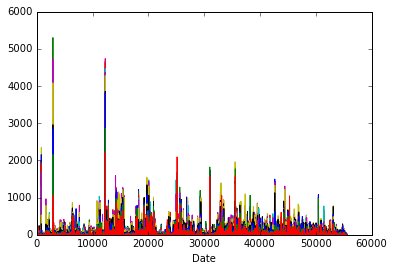

In [11]:
########################################
# plot dataframe SCRATCH
########################################
import matplotlib.pyplot as plt
import pandas
#from pandas import DataFrame
%matplotlib inline

df = pandas.read_csv('./output/checkin.csv')
#print df
plt.plot(df.drop('BusinessId', axis = 1))
plt.xlabel('Date')
plt.xlim('Jan 2015' , 'Dec 2015')
plt.ylabel('Posts')